In [1]:
import sklearn
import os, re, string, collections, random
import spacy
import nltk
import numpy as np 
import matplotlib
import pandas as pd

# for storpwords
import nltk
from nltk.corpus import stopwords

# para limpieza
import unicodedata


# para tdif
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# calculos similitudes
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt


print(os.getcwd())

/Users/habi/Documents/personal/nlp_course/tareas_talleres/taller_2_clustering


In [2]:
df = pd.read_excel('trinoscerveza.xlsx')
df = pd.read_csv('trinos_cerveza.csv', sep='|')
print(df.shape)
df.head()

(200, 91)


,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,text2
0,187077341,1420117682163228672,2021-07-27 20:23:34,Seahawk_Davo,"@intensaaa2020 Mmm ya me fastidie, no me gusta...",Twitter for Android,68,1.419892e+18,1.337034e+18,intensaaa2020,...,1856,2010-09-05 05:30:41,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/18707734...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/8402706560...,"@intensaaa2020 Mmm ya me fastidie, no me gusta..."
1,754923173422833665,1420117600227536899,2021-07-27 20:23:15,susiurbizu,No saben lo mucho que quisiera que me gustara ...,Twitter for iPhone,70,NaN,NaN,NaN,...,4451,2016-07-18 06:18:05,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/75492317...,NaN,http://pbs.twimg.com/profile_images/1392738046...,No saben lo mucho que quisiera que me gustara ...
2,4518941727,1420117528110587905,2021-07-27 20:22:57,Veothfolnir,Escribo mal porque he bebido medio litro de ce...,TweetDeck,100,NaN,NaN,NaN,...,25370,2015-12-18 00:02:33,False,https://t.co/0pxjj8LIZr,https://www.youtube.com/channel/UCRsjWfA-Z4veF...,NaN,https://pbs.twimg.com/profile_banners/45189417...,NaN,http://pbs.twimg.com/profile_images/1340260811...,Escribo mal porque he bebido medio litro de ce...
3,1284180586257670147,1420117527384965121,2021-07-27 20:22:57,tu_tio_teviola,"@marlasuarezzz Cerveza, Vino, Whisky, Helado j...",Twitter for Android,42,1.420092e+18,1.282937e+18,marlasuarezzz,...,18904,2020-07-17 17:38:24,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/12841805...,NaN,http://pbs.twimg.com/profile_images/1417326584...,"@marlasuarezzz Cerveza, Vino, Whisky, Helado j..."
4,1338605739221413888,1420117511786442752,2021-07-27 20:22:53,topdescuentostg,"💥Taza de Café, 18oz Vaso Termico Café Termo Do...",FRIKItwitter,260,NaN,NaN,NaN,...,0,2020-12-14 22:04:48,False,https://t.co/ks5VRb7KD1,https://t.me/TOP_Descuentos,NaN,https://pbs.twimg.com/profile_banners/13386057...,NaN,http://pbs.twimg.com/profile_images/1338609798...,"💥Taza de Café, 18oz Vaso Termico Café Termo Do..."


##### Get text twitter information 

In [3]:
twitter_text=df["text"].values.tolist()
print(len(twitter_text))
print(twitter_text[:10])

200
['@intensaaa2020 Mmm ya me fastidie, no me gusta beber casi nada dw alcohol o cerveza', 'No saben lo mucho que quisiera que me gustara la cerveza pero nomás no', 'Escribo mal porque he bebido medio litro de cerveza sin ingesta previa de alimento. Sorry not sorry.', '@marlasuarezzz Cerveza, Vino, Whisky, Helado jejejeje 🤣💪🏻', '💥Taza de Café, 18oz Vaso Termico Café Termo Doble Pared Aislamiento al vacío Acero Inoxidable con Tapa a Prueba de Fugas Taza Reutilizable Ecológica para Café té y Cerveza(Bl...\n🛒 https://t.co/rNO3veZhTg\n❌ 𝘈𝘯𝘵𝘦𝘴: 14,99€\n✅ 𝗔𝗛𝗢𝗥𝗔: 𝟴,𝟱𝟵€\n👁 https://t.co/LEd1UBTvAA https://t.co/uRVmLendRh', 'Me he replanteado dejar de beber cerveza.\n\nSolo me lo he replanteado.', '@_JNox_ Bonico del tó. \nY cerveza.\nAins.', '@abogadolpa Una cerveza para este hombre por dios!!', 'Si Costanera 700 es tan bueno por qué no lo tenía en el radar? \nAhora, lo que encarece una cuenta es el vino y hay que estar bien pendejo o ser un ignorante en el tema para pedir una botella si no to

#### Creando Stopwords del español 

In [4]:
nltk.download("stopwords")
misstop=stopwords.words("spanish")+["á","Y"]

def filter_stopwords_f(texto:list):
    '''Función que elimina stopwords de una lista de texto'''
    filter_word =[word for word in texto if word not in misstop]
    return(filter_word)    

[nltk_data] Downloading package stopwords to /Users/habi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def elimina_tildes(s):
    "Elimina tildes y espacio y deja todo formateado en guion bajo"
    s      = re.sub(r'[\W_]+', ' ', s).lower().strip(' ').strip()
    result = ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
    return result


In [6]:
def general_twitter_cleaning(x):
    '''Función que limpia contenido de un twitter'''
    #    x = twitter_text[160]
    # delete urls 
    x = re.sub('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-&?=%.]+', ' ', x)
    x = re.sub('@[^\s]+', ' ', x)
    # format general text
    x = elimina_tildes(x)
    # eliminando Risas
#    x = re.sub('[^[ja]+', ' ', x)
    return x

In [7]:
nltk.download("punkt")
filter_text=[]

#ciclo que limpia palabras, quita tokenización
for i in range(len(twitter_text)):
    twitter_text[i] = general_twitter_cleaning(twitter_text[i])
    #tokenizando palabras del español
    word_tokenize_i =nltk.tokenize.word_tokenize(twitter_text[i],language="spanish")
    tempfilt=filter_stopwords_f(word_tokenize_i)
    filter_text.append(tempfilt)
    
#uniendo todo el texto
all_text_join=[]
for element in filter_text:
    all_text_join.append(" ".join(element))
#all_text_join

[nltk_data] Downloading package punkt to /Users/habi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### veamos la nube de palabras de lo que se obtuvo hasta el momento 

In [8]:
len(all_text_join)

200

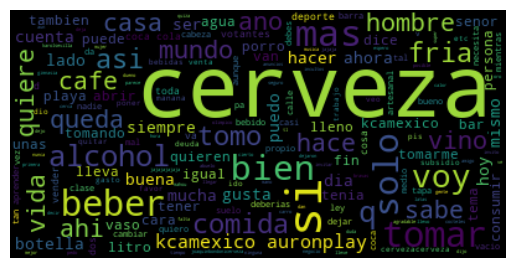

None

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#nube sin stopwords
nubeb=WordCloud()
nubeb.generate(''.join(all_text_join))
plt.figure()
plt.imshow(nubeb, interpolation="bilinear")
plt.axis("off")
figura2=plt.show()
display(figura2)

# creando Tf-idf de cada descripción del texto de los twitters

In [10]:
##notse que no uso max_features porque no espero un volumen grande de palabras.
vectores=TfidfVectorizer(max_df=0.9,min_df=2)
tfslimpio=vectores.fit_transform(all_text_join)
nombreslimpio=vectores.get_feature_names_out()
matriz=tfslimpio.todense()
matlist=matriz.tolist()
finalm=pd.DataFrame(matlist,columns=nombreslimpio)
final2=finalm.transpose()
finalm.head(10)

,25,31,abrir,abuelo,acabo,acuerdo,agua,ahi,ahora,alcohol,...,veces,ven,vender,veo,verdad,vez,vida,vino,voy,whisky
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.474714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.654998,0.0,0.755631
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
6,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
7,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
8,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.271235,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.271235,0.0,0.000000
9,0.0,0.0,0.508092,0.0,0.537819,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [11]:
print('Total de datos para segmentación')
print(finalm.shape)

Total de datos para segmentación
(200, 201)


In [12]:
print('Normalizando el vector con base al coseno y norma L2')
finalsinceros=finalm.loc[finalm.sum(axis=1)!=0,]
length = np.sqrt((finalsinceros**2).sum(axis=1))[:,None]
finalm2 = finalsinceros / length 
##corregir si lenght=0


Normalizando el vector con base al coseno y norma L2


/var/folders/p1/3s8c0dxx21bfvlztxjr_3h840000gp/T/ipykernel_3887/912325306.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  length = np.sqrt((finalsinceros**2).sum(axis=1))[:,None]


# KMEDIAS

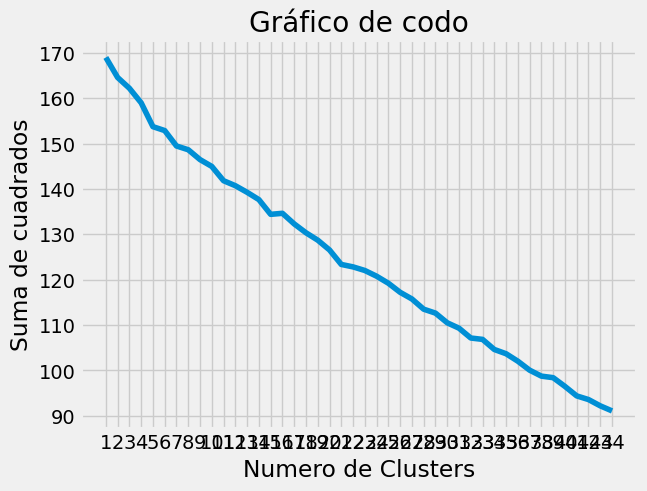

In [13]:
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

sse=[]
for k in range(1, 45):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(finalm2)
  sse.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 45), sse)
plt.xticks(range(1, 45))
plt.xlabel("Numero de Clusters")
plt.ylabel("Suma de cuadrados")
plt.title('Gráfico de codo')
plt.show()



In [14]:
kmeans = KMeans(n_clusters=8).fit(finalm2)
centroids = kmeans.cluster_centers_
# display(centroids)

In [15]:
destacados=np.argsort(centroids,axis=1)[:,-4:]
#display(destacados)

In [16]:
#guardo como listas los indices y las palabras
llevarlos=destacados.tolist()
paltotal=nombreslimpio.tolist()
#detecto que palabras corresponden a cada cluster
palabras_total=[]
for i in range(len(llevarlos)):
  palabras_linea=[]
  for k in range(len(llevarlos[i])):
    palabras_linea.append(paltotal[llevarlos[i][k]])
  palabras_total.append(palabras_linea)
print(palabras_total)

[['cafe', 'hombre', 'dios', 'vida'], ['mano', 'casa', 'mucha', 'siempre'], ['31', 'auronplay', 'joaquinbondoni', 'kcamexico'], ['manana', 'voy', 'tomar', 'si'], ['igual', 'fria', 'asi', 'bien'], ['quitar', 'bebidas', 'etc', 'mas'], ['vino', 'solo', 'gusta', 'tomo'], ['parece', 'solo', 'alcohol', 'beber']]


In [17]:
labels = pd.DataFrame(kmeans.predict(finalm2))
labels = labels.assign(index_ = finalm2.index)
labels = labels.assign(texto_limpio = labels.index_.apply(lambda x: all_text_join[x]))
labels.columns = ['cluster', 'index_', 'texto_limpio']

In [18]:
df_final = df.loc[:, 'text'].reset_index()
df_final.columns = ['index_', 'texto_original']

In [19]:
df_final = df_final.merge(labels, how= 'left', on ='index_')

In [20]:
df_final

,index_,texto_original,cluster,texto_limpio
0,0,"@intensaaa2020 Mmm ya me fastidie, no me gusta...",7.0,mmm fastidie gusta beber casi dw alcohol cerveza
1,1,No saben lo mucho que quisiera que me gustara ...,0.0,saben quisiera gustara cerveza nomas
2,2,Escribo mal porque he bebido medio litro de ce...,0.0,escribo mal bebido medio litro cerveza ingesta...
3,3,"@marlasuarezzz Cerveza, Vino, Whisky, Helado j...",6.0,cerveza vino whisky helado jejejeje
4,4,"💥Taza de Café, 18oz Vaso Termico Café Termo Do...",0.0,taza cafe 18oz vaso termico cafe termo doble p...
...,...,...,...,...
195,195,Ganas de tomarme 18L cerveza pero ninguna de m...,0.0,ganas tomarme 18l cerveza ninguna moverme sofa
196,196,@AUR0NBUH0 cerveza\n#KCAMexico #AuronPlay #Joa...,2.0,cerveza kcamexico auronplay joaquinbondoni
197,197,@yosoylalimon @senora_rubia Barda es un ejempl...,6.0,barda ejemplo vacio contenido retuits puto lun...
198,198,si me vacune ayer puedo beber cerveza hoy??? d...,7.0,si vacune ayer puedo beber cerveza hoy duda seria


# perfilando segmentos

In [21]:
idd = df_final.cluster.isnull()==False
total_plots = len(df_final.loc[idd,:].cluster.unique().tolist())

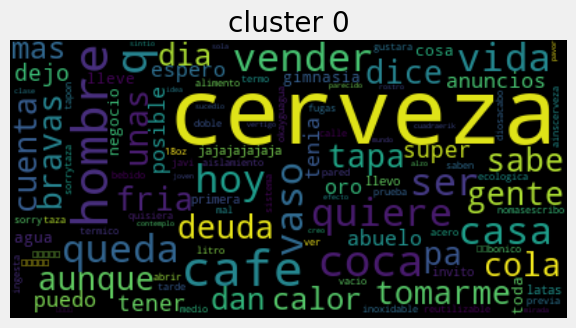

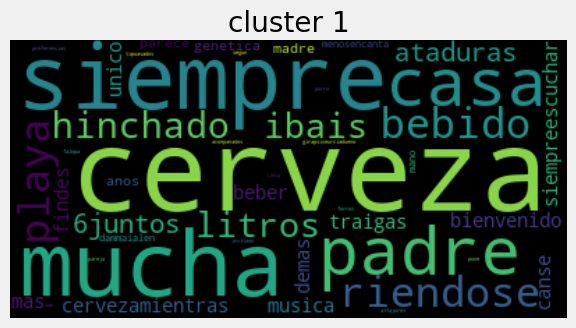

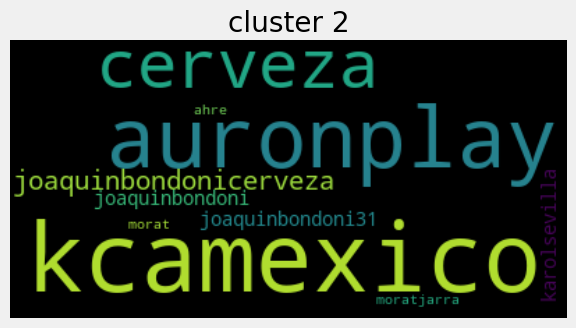

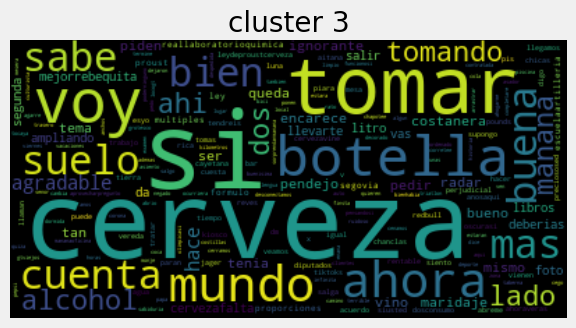

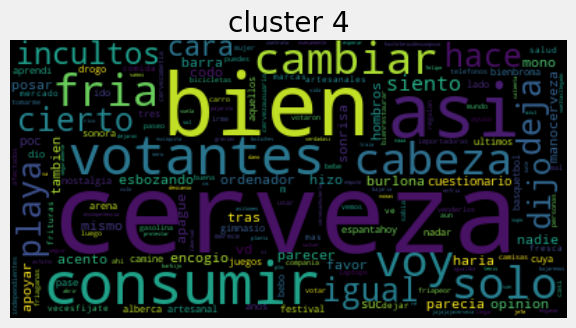

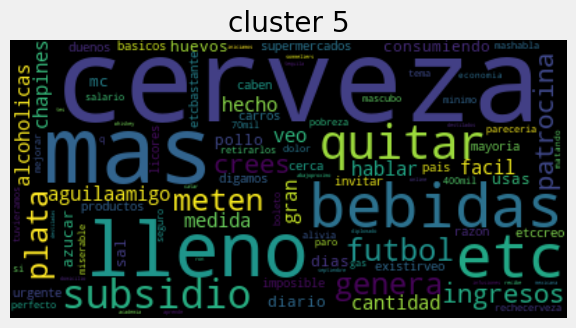

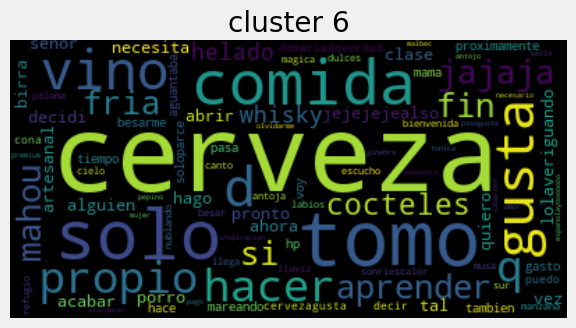

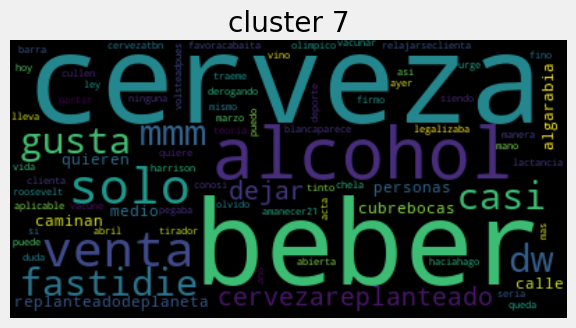

In [22]:
list_plots = list()
for cluster_ in range(total_plots):
    #cluster_ = 1
    #nube sin stopwords
    if isinstance(cluster_, int ):
        nubeb=WordCloud()
        text_list_temp = df_final.loc[df_final.cluster==cluster_].texto_limpio.tolist()
        nubeb.generate(''.join(text_list_temp))
        plt.figure()
        plt.imshow(nubeb, interpolation="bilinear")
        plt.axis("off")
        plt.title(f'cluster {cluster_}')
        plt.show()


